## Importando as bibliotecas

In [1]:
#Importação dos pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import warnings
warnings.filterwarnings("ignore")

### Importando a base de Acessos e colocando o campo 'Data' como o index

In [3]:
df = pd.read_csv('Acessos_Banda_Larga_Fixa_Total_2020_2022.csv',index_col='Data',parse_dates=True)
df.index.freq = 'MS'
df.head(5)

,Acessos
Data,
2020-01-01,32937919
2020-02-01,33175908
2020-03-01,33216768
2020-04-01,33582173
2020-05-01,33901720


In [4]:
df.shape

(31, 1)

In [5]:
#Separa a base em treino e teste
# 25 meses (80%) para treino.
# Deixa 6 meses (20%) para teste
train = df.iloc[:len(df)-6] 
test = df.iloc[len(df)-6:] 

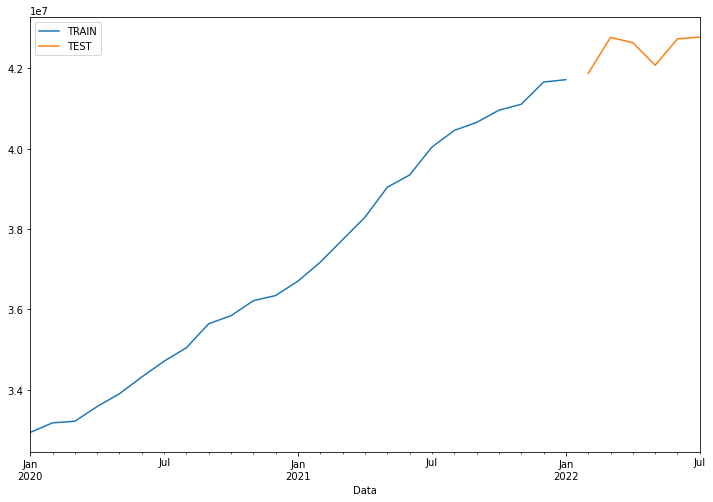

In [6]:
#Visualização dos dados de treino e teste
train['Acessos'].plot(legend=True,label='TRAIN')
test['Acessos'].plot(legend=True,label='TEST',figsize=(12,8));

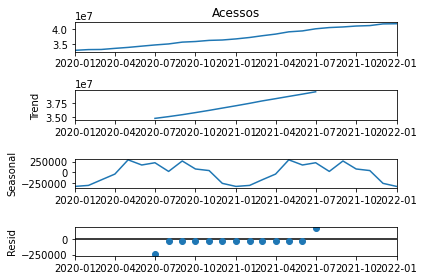

In [7]:
#Decomposição da série em componentes de tendência, sazonalidade e ruído
seasonal_decompose(train['Acessos']).plot();

### Cenário I - Geração das previsões via ALISAMENTO EXPONENCIAL SIMPLES (que não considera tendência nem sazonalidade)

In [8]:
#Geração das previsões
span = 12 # O modelo considerará uma média ponderada dos últimos 12 meses para calcular as previsões
alpha = 2/(span+1) #Coeficiente de amortecimento, que varia sempre 0 e 1 
model = SimpleExpSmoothing(train['Acessos']).fit(smoothing_level=alpha)
test_predictions = model.forecast(6).rename('SES Forecast')

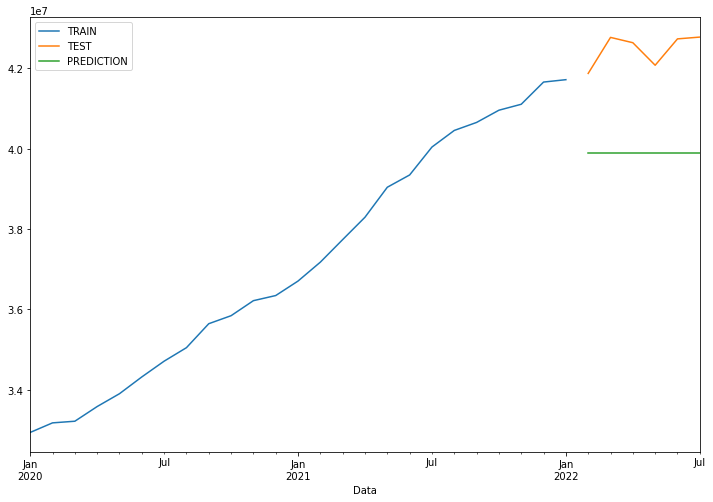

In [9]:
#Visualização das predições no gráfico
train['Acessos'].plot(legend=True,label='TRAIN')
test['Acessos'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION');

In [10]:
#Cálculo da acurácia da previsão (quanto menor o RMS, melhor a previsão)
from sklearn.metrics import mean_squared_error
rms_error = np.sqrt(mean_squared_error(test['Acessos'],test_predictions))
print("RMS Error is ",rms_error) 

RMS Error is  2615322.6821414274


In [11]:
rmse = np.sqrt(mean_squared_error(test['Acessos'], test_predictions)).round(2)
mape = np.round(np.mean(np.abs(test['Acessos']-test_predictions)/test['Acessos'])*100,2)

In [12]:
print(rmse)
print(mape)

2615322.68
6.09


### Cenário II - Geração das previsões via ALISAMENTO EXPONENCIAL DUPLO OU MÉTODO DE HOLT (que leva em conta a tendência da série)

In [13]:
#Geração das previsões
double_model = ExponentialSmoothing(train['Acessos'],trend='add').fit()
test_predictions = double_model.forecast(6).rename('DES Forecast')

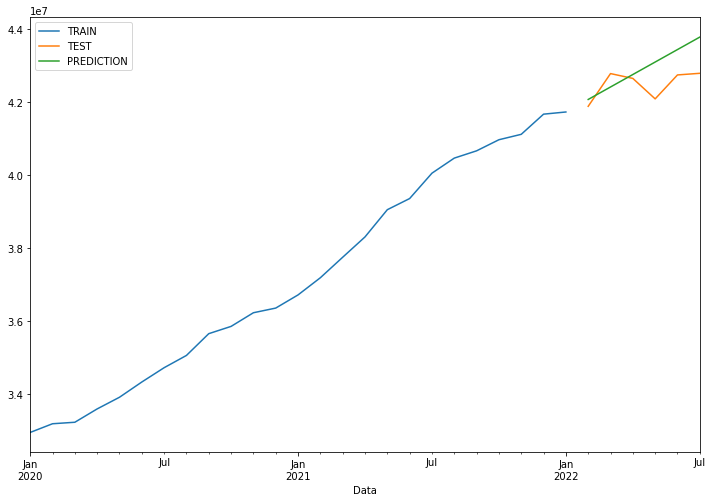

In [14]:
#Visualização das previsões
train['Acessos'].plot(legend=True,label='TRAIN')
test['Acessos'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION');

In [15]:
#Cálculo do erro de previsão
rms_error = np.sqrt(mean_squared_error(test['Acessos'],test_predictions))
print("RMS Error for DES is ",rms_error)

RMS Error for DES is  666759.6655699698


In [16]:
rmse = np.sqrt(mean_squared_error(test['Acessos'], test_predictions)).round(2)
mape = np.round(np.mean(np.abs(test['Acessos']-test_predictions)/test['Acessos'])*100,2)

In [17]:
print(rmse)
print(mape)

666759.67
1.32


### Cenário III - Geração das previsões via ALISAMENTO EXPONENCIAL TRIPLO OU MÉTODO DE HOLT-WINTERS (que leva em conta a tendência e a sazonalidade da série)

In [18]:
#Geração das previsões
triple_model = ExponentialSmoothing(train['Acessos'],trend='add',seasonal='add',seasonal_periods=12).fit()
test_predictions = triple_model.forecast(6).rename('TES Forecast')

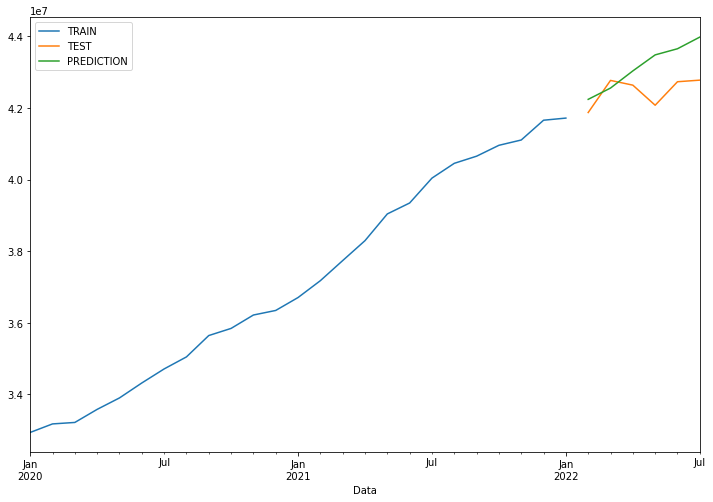

In [19]:
#Visualização das previsões
train['Acessos'].plot(legend=True,label='TRAIN')
test['Acessos'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION');

In [20]:
#Cálculo do erro de previsão
rms_error = np.sqrt(mean_squared_error(test['Acessos'],test_predictions))
print("RMS Error for TES is ",rms_error)

RMS Error for TES is  876513.0933918578


In [21]:
rmse = np.sqrt(mean_squared_error(test['Acessos'], test_predictions)).round(2)
mape = np.round(np.mean(np.abs(test['Acessos']-test_predictions)/test['Acessos'])*100,2)

In [22]:
print(rmse)
print(mape)

876513.09
1.77
